# Noise Shaping

This code is provided as supplementary material of the lecture "Coding of Audiovisual Signals".

This code illustrates
* Spectral effects of noise shaping
* Impact on waveform

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import shutil
from scipy.signal import lfilter
import IPython.display as ipd


Provide 3 short speech segments of 160 or 200 samples. Sampling rate is 8 kHz

In [2]:
# Speech segment of 160 samples
x1 = np.array([-0.207794189453125, -0.14373779296875, -0.089324951171875, -0.053741455078125, -0.008697509765625, 0.2076416015625, 0.54339599609375, 0.81683349609375, 0.873748779296875, 0.645538330078125, 0.152435302734375, -0.382354736328125, -0.702850341796875, -0.70849609375, -0.451141357421875, -0.122955322265625, 0.1376953125, 0.24139404296875, 0.236968994140625, 0.24041748046875, 0.311737060546875, 0.378265380859375, 0.35736083984375, 0.178863525390625, -0.1441650390625, -0.476043701171875, -0.64288330078125, -0.57012939453125, -0.316619873046875, -0.0008544921875, 0.23065185546875, 0.308685302734375, 0.270050048828125, 0.20855712890625, 0.178955078125, 0.16607666015625, 0.12103271484375, -0.008819580078125, -0.1939697265625, -0.355560302734375, -0.377593994140625, -0.23626708984375, 0.060791015625, 0.364959716796875, 0.556365966796875, 0.558990478515625, 0.352783203125, 0.159423828125, -0.088836669921875, -0.202728271484375, -0.22698974609375, -0.24761962890625, -0.192840576171875, -0.16845703125, -0.055938720703125, 0.057952880859375, 0.1473388671875, 0.197967529296875, 0.136474609375, 0.0382080078125, -0.0670166015625, -0.117156982421875, -0.117156982421875, -0.104766845703125, -0.079833984375, -0.100494384765625, -0.11187744140625, -0.104034423828125, -0.072845458984375, -0.020172119140625, -0.00238037109375, -0.005950927734375, -0.0645751953125, -0.144805908203125, -0.197265625, -0.22705078125, -0.190093994140625, -0.151397705078125, -0.125701904296875, -0.107513427734375, -0.126251220703125, -0.0926513671875, 0.076995849609375, 0.449615478515625, 0.78106689453125, 0.891204833984375, 0.715179443359375, 0.26519775390625, -0.233978271484375, -0.575714111328125, -0.608123779296875, -0.413787841796875, -0.176422119140625, 0.003387451171875, 0.07977294921875, 0.105255126953125, 0.186614990234375, 0.33642578125, 0.46356201171875, 0.4393310546875, 0.23480224609375, -0.1007080078125, -0.428741455078125, -0.571533203125, -0.506591796875, -0.29779052734375, -0.075469970703125, 0.06683349609375, 0.127777099609375, 0.14630126953125, 0.19757080078125, 0.27294921875, 0.30499267578125, 0.22674560546875, 0.033294677734375, -0.199920654296875, -0.35833740234375, -0.35699462890625, -0.199920654296875, 0.0191650390625, 0.232574462890625, 0.423675537109375, 0.434906005859375, 0.368133544921875, 0.25726318359375, 0.09747314453125, -0.02215576171875, -0.165771484375, -0.258056640625, -0.297332763671875, -0.266632080078125, -0.121368408203125, 0.035186767578125, 0.138641357421875, 0.174224853515625, 0.131378173828125, 0.051116943359375, -0.014251708984375, -0.036712646484375, -0.06591796875, -0.09552001953125, -0.12408447265625, -0.154541015625, -0.1402587890625, -0.0977783203125, -0.0321044921875, 0.01239013671875, 0.006805419921875, -0.01763916015625, -0.065582275390625, -0.11083984375, -0.142242431640625, -0.1697998046875, -0.189727783203125, -0.180389404296875, -0.1824951171875, -0.16009521484375, -0.132598876953125, -0.1134033203125, -0.0556640625])            

# Another speech segment of 160 samples
x2 = np.array([-0.04638671875, 0.030548095703125, 0.10589599609375, 0.529296875, 0.601470947265625, 0.218902587890625, 0.08935546875, -0.11993408203125, -0.223052978515625, -0.2833251953125, -0.324920654296875, -0.49737548828125, -0.285675048828125, 0.112030029296875, 0.220703125, 0.319091796875, 0.308441162109375, 0.245086669921875, 0.204315185546875, 0.16070556640625, -0.139312744140625, -0.408203125, -0.375823974609375, -0.3101806640625, -0.1876220703125, -0.04791259765625, 0.02752685546875, 0.1448974609375, 0.33306884765625, 0.397064208984375, 0.24212646484375, 0.09173583984375, -0.02392578125, -0.150390625, -0.219207763671875, -0.27972412109375, -0.2874755859375, -0.14593505859375, 0.052703857421875, 0.134002685546875, 0.173553466796875, 0.1744384765625, 0.14178466796875, 0.0765380859375, -0.029998779296875, -0.183258056640625, -0.253570556640625, -0.219818115234375, -0.17730712890625, -0.154571533203125, -0.14337158203125, -0.137451171875, -0.091339111328125, 0.014373779296875, 0.023834228515625, 0.3455810546875, 0.79345703125, 0.262420654296875, 0.135650634765625, -0.060546875, -0.207672119140625, -0.243316650390625, -0.337188720703125, -0.456085205078125, -0.483612060546875, 0.134979248046875, 0.189453125, 0.311767578125, 0.306793212890625, 0.2708740234375, 0.2396240234375, 0.198455810546875, -0.058380126953125, -0.44927978515625, -0.39019775390625, -0.3004150390625, -0.226226806640625, -0.078826904296875, -0.017974853515625, 0.1412353515625, 0.3377685546875, 0.44183349609375, 0.23114013671875, 0.09283447265625, 0.009185791015625, -0.126678466796875, -0.19622802734375, -0.301239013671875, -0.3134765625, -0.159637451171875, 0.065643310546875, 0.115203857421875, 0.157684326171875, 0.1778564453125, 0.159332275390625, 0.10162353515625, -0.032623291015625, -0.209808349609375, -0.272857666015625, -0.217376708984375, -0.2027587890625, -0.19085693359375, -0.195892333984375, -0.1927490234375, -0.126983642578125, 0.043609619140625, 0.64410400390625, 0.769317626953125, 0.27093505859375, 0.17034912109375, -0.034942626953125, -0.118377685546875, -0.292938232421875, -0.486236572265625, -0.669342041015625, -0.3399658203125, 0.15625, 0.180419921875, 0.2840576171875, 0.316131591796875, 0.401519775390625, 0.380340576171875, 0.20623779296875, -0.235992431640625, -0.46319580078125, -0.3486328125, -0.3184814453125, -0.28692626953125, -0.19842529296875, -0.02142333984375, 0.26025390625, 0.467926025390625, 0.39825439453125, 0.170166015625, 0.13427734375, 0.074432373046875, -0.10760498046875, -0.28704833984375, -0.39154052734375, -0.3084716796875, -0.079193115234375, 0.054412841796875, 0.058990478515625, 0.155731201171875, 0.242462158203125, 0.2216796875, 0.088409423828125, -0.09698486328125, -0.235565185546875, -0.22857666015625, -0.232086181640625, -0.287567138671875, -0.2916259765625, -0.244415283203125, -0.177764892578125, -0.065185546875, 0.603363037109375, 0.89129638671875, 0.330322265625, 0.275360107421875])

# Another speech segment of 200 samples
x3 = np.array([0.18499755859375, -0.117767333984375, -0.311737060546875, -0.24688720703125, -0.1182861328125, -0.117340087890625, -0.289337158203125, -0.17926025390625, -0.077484130859375, 0.0166015625, 0.268951416015625, 0.322235107421875, 0.188385009765625, 0.17236328125, 0.245697021484375, 0.1610107421875, -0.0020751953125, -0.079376220703125, -0.19970703125, -0.23602294921875, -0.109893798828125, -0.1099853515625, -0.18695068359375, -0.15948486328125, -0.070831298828125, -0.085540771484375, -0.11187744140625, -0.09173583984375, -0.126739501953125, -0.132904052734375, -0.05096435546875, -0.073883056640625, -0.185546875, -0.22607421875, -0.138427734375, 0.021514892578125, 0.62823486328125, 0.711212158203125, 0.180938720703125, 0.370361328125, 0.221923828125, 0.217193603515625, 0.224090576171875, -0.213897705078125, -0.3369140625, -0.6585693359375, -0.268890380859375, -0.10296630859375, -0.406890869140625, -0.158905029296875, -0.209503173828125, 0.05975341796875, 0.3399658203125, 0.369873046875, 0.35540771484375, 0.052886962890625, 0.24627685546875, 0.326751708984375, 0.087799072265625, -0.005950927734375, -0.229278564453125, -0.309417724609375, -0.22454833984375, -0.1424560546875, -0.13909912109375, -0.263824462890625, -0.13616943359375, 0.085235595703125, 0.176300048828125, 0.2435302734375, 0.254669189453125, 0.20880126953125, 0.1678466796875, 0.19970703125, 0.114410400390625, -0.10589599609375, -0.175750732421875, -0.166900634765625, -0.172119140625, -0.1519775390625, -0.133270263671875, -0.125335693359375, -0.100494384765625, -0.028656005859375, -0.057373046875, -0.146697998046875, -0.1240234375, -0.087921142578125, -0.085662841796875, -0.087890625, -0.142547607421875, -0.230194091796875, -0.25482177734375, -0.11077880859375, 0.278656005859375, 0.80303955078125, 0.460540771484375, 0.215179443359375, 0.44268798828125, 0.164306640625, 0.287872314453125, 0.046600341796875, -0.344085693359375, -0.471771240234375, -0.620269775390625, -0.131805419921875, -0.272705078125, -0.391845703125, -0.101898193359375, -0.130035400390625, 0.252960205078125, 0.40167236328125, 0.38580322265625, 0.286407470703125, 0.0968017578125, 0.34173583984375, 0.239715576171875, -0.02545166015625, -0.121337890625, -0.30609130859375, -0.3115234375, -0.225982666015625, -0.169891357421875, -0.193450927734375, -0.228607177734375, -0.010345458984375, 0.1719970703125, 0.233917236328125, 0.299957275390625, 0.276092529296875, 0.215301513671875, 0.17694091796875, 0.147247314453125, 0.01165771484375, -0.18121337890625, -0.206024169921875, -0.192596435546875, -0.189239501953125, -0.1400146484375, -0.105499267578125, -0.080810546875, -0.045623779296875, -0.01806640625, -0.07305908203125, -0.142120361328125, -0.098236083984375, -0.080718994140625, -0.098907470703125, -0.111724853515625, -0.185211181640625, -0.242462158203125, -0.191802978515625, -0.0880126953125, 0.370025634765625, 0.83026123046875, 0.3682861328125, 0.30230712890625, 0.385772705078125, 0.12567138671875, 0.2847900390625, -0.093292236328125, -0.324615478515625, -0.5321044921875, -0.619415283203125, -0.106414794921875, -0.325897216796875, -0.28125, -0.066741943359375, -0.06597900390625, 0.3316650390625, 0.385772705078125, 0.43206787109375, 0.286102294921875, 0.090545654296875, 0.30194091796875, 0.147430419921875, -0.07379150390625, -0.174713134765625, -0.3399658203125, -0.321990966796875, -0.250274658203125, -0.15753173828125, -0.132232666015625, -0.158172607421875, 0.057098388671875, 0.228271484375, 0.2528076171875, 0.326416015625, 0.295135498046875, 0.17510986328125, 0.104705810546875, 0.063751220703125, -0.052093505859375, -0.218719482421875, -0.233551025390625, -0.19537353515625, -0.177581787109375, -0.098175048828125, -0.046051025390625, -0.047515869140625])

Help functions. Recall that the noise PSD of the quantizer is given by
$$
\Phi_{RR}(\mathrm{e}^{\mathrm{j}\Omega}) = \Phi_{WW}(\mathrm{e}^{\mathrm{j}\Omega})\cdot\left\vert \frac{1 - A\left(\frac{1}{\gamma}\mathrm{e}^{\mathrm{j}\Omega}\right)}{1 - A\left(\mathrm{e}^{\mathrm{j}\Omega}\right)}\right\vert^2
$$
with 
$$
\Phi_{WW}(\mathrm{e}^{\mathrm{j}\Omega}) = \frac{\Delta^2}{12}
$$

In [3]:
# helper function calculating the auto-correlation coefficient r
def get_r(x, l):    
    x_shift = np.roll(x,l)
    x_shift[:l] = 0        
    return np.correlate(x,x_shift)[0]
    
    
def get_prediction_coefficients(x, n):
    r = np.array([get_r(x,k) for k in np.arange(1,n+1)])
    R = np.array([np.concatenate(([get_r(x,j) for j in np.arange(i,0,-1)], [get_r(x,j) for j in np.arange(0,n-i)])) for i in range(n)])    
    
    a_opt = np.linalg.inv(R) @ r
    return a_opt

def get_noise_psd(a, Delta, gamma, Omega):
    Phi_WW = (Delta**2) / 12

    # compute spectrum of analysis filter G(z) = 1 - A(z)
    G = np.ones_like(Omega) + 1j*np.zeros_like(Omega)
    for k in range(len(a)):
        G -= a[k] * np.exp(-1j*(k+1)*Omega)
    
    # compute scaled spectrum required in the numerator
    Gnum = np.ones_like(Omega) + 1j*np.zeros_like(Omega)
    for k in range(len(a)):
        Gnum -= a[k] * np.exp(-1j*(k+1)*Omega) * np.power(gamma, k+1)
    
    Phi_RR = Phi_WW * np.square( np.abs( Gnum / G ) )
    return Phi_RR

Calculate predictor coefficients and compute spectrum of the analysis filter $G(z) = 1-A(z)$

In [4]:
# use signal x2
x = x3

# 8 predictor coefficients
n = 8


a = get_prediction_coefficients(x, n)

Omega = np.linspace(0,np.pi,512)

# compute spectrum of analysis filter G(z) = 1 - A(z)
G = np.ones_like(Omega) + 1j*np.zeros_like(Omega)
for k in range(len(a)):
    G -= a[k] * np.exp(-1j*(k+1)*Omega)

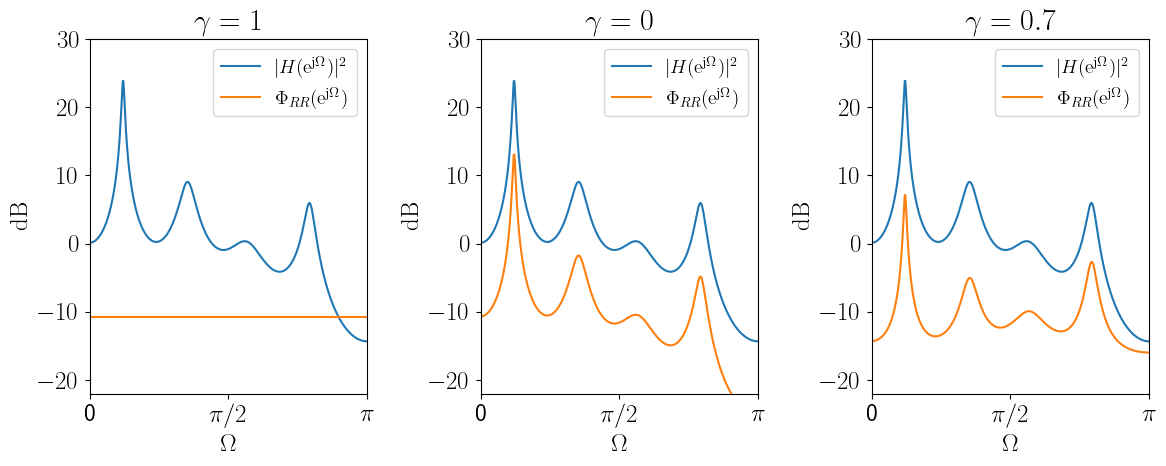

In [7]:
font = {'size'   : 18}
plt.rc('font', **font)
plt.rc('text', usetex=True if shutil.which('latex') else False)

plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)

# plot spectrum of synthesis filter H(z) = 1/G(z)
plt.plot(Omega, 10*np.log10(1/np.square((np.abs(G)))))
# plot quantization noise PSD (assume Delta = 1)
plt.plot(Omega, 10*np.log10(get_noise_psd(a, 1, 1, Omega)))

plt.xlim((0,np.pi))
plt.ylim((-22,30))
plt.xticks([0,np.pi/2,np.pi],labels=['0', r'$\pi/2$', r'$\pi$'])
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\mathrm{dB}$')
plt.title(r'$\gamma=1$')
plt.legend([r'$|H(\mathrm{e}^{\mathrm{j}\Omega})|^2$',r'$\Phi_{RR}(\mathrm{e}^{\mathrm{j}\Omega})$'], fontsize=14)

plt.subplot(1,3,2)
# plot spectrum of synthesis filter H(z) = 1/G(z)
plt.plot(Omega, 10*np.log10(1/np.square((np.abs(G)))))
# plot quantization noise PSD (assume Delta = 1)
plt.plot(Omega, 10*np.log10(get_noise_psd(a, 1, 0, Omega)))

plt.xlim((0,np.pi))
plt.ylim((-22,30))
plt.xticks([0,np.pi/2,np.pi],labels=['0', r'$\pi/2$', r'$\pi$'])
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\mathrm{dB}$')
plt.title(r'$\gamma=0$')
plt.legend([r'$|H(\mathrm{e}^{\mathrm{j}\Omega})|^2$',r'$\Phi_{RR}(\mathrm{e}^{\mathrm{j}\Omega})$'], fontsize=14)

plt.subplot(1,3,3)
# plot spectrum of synthesis filter H(z) = 1/G(z)
plt.plot(Omega, 10*np.log10(1/np.square((np.abs(G)))))
# plot quantization noise PSD (assume Delta = 1)
plt.plot(Omega, 10*np.log10(get_noise_psd(a, 1, 0.8, Omega)))
plt.xlim((0,np.pi))
plt.ylim((-22,30))
plt.xticks([0,np.pi/2,np.pi],labels=['0', r'$\pi/2$', r'$\pi$'])
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\mathrm{dB}$')
plt.title(r'$\gamma=0.7$')
plt.legend([r'$|H(\mathrm{e}^{\mathrm{j}\Omega})|^2$',r'$\Phi_{RR}(\mathrm{e}^{\mathrm{j}\Omega})$'], fontsize=14)

plt.tight_layout()
#plt.savefig('figure_DST_8.10.pdf',bbox_inches='tight')